# Import Libraries

In [45]:
#If need to reimport something
def rel(name):
    importlib.reload(sys.modules[name])

In [46]:
import numpy as np
import pandas as pd
import sys, importlib
import matplotlib.pyplot as plt

In [47]:
import Evaluator

 # Build Data

In [49]:

from DataBuilder import DataBuilder
rel('DataBuilder')
rel('MLData')
rel('Heuristics')

databuilder = DataBuilder(False)

100%|██████████| 3/3 [01:53<00:00, 37.74s/it]


In [50]:
X_Train, y_Train, X_Test, y_Test = databuilder.confs['data3']['conf5']

In [51]:
databuilder.confs.keys()

dict_keys(['data1', 'data2', 'data3'])

In [52]:
import numpy as np
def remove_nan(array):
    indices = np.where(np.isnan(array))
    array[indices] = 0
    return array
from skRandomForest import skRandomForest
rel('skRandomForest')

skRF = skRandomForest()
model = skRF.best_model(metric = 'mae')
X_train = remove_nan(X_Train)
X_Test = remove_nan(X_Test)

These are the best parameters {'rf__max_depth': 60, 'rf__min_samples_leaf': 3, 'rf__min_samples_split': 8, 'rf__n_estimators': 250}
60
[60]
3
[3]
8
[8]
250
[250]


In [53]:
model.fit(X_Train, y_Train.ravel())

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   15.1s finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('rf',
                                        RandomForestRegressor(n_jobs=-1))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [60], 'rf__min_samples_leaf': [3],
                         'rf__min_samples_split': [8],
                         'rf__n_estimators': [250]},
             verbose=3)

In [55]:
preds = model.predict(X_Train)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(preds, y_Train)

0.17344279500740326

In [10]:
importances = forest.feature_importances_
importances.shape

NameError: name 'forest' is not defined

Feature ranking:


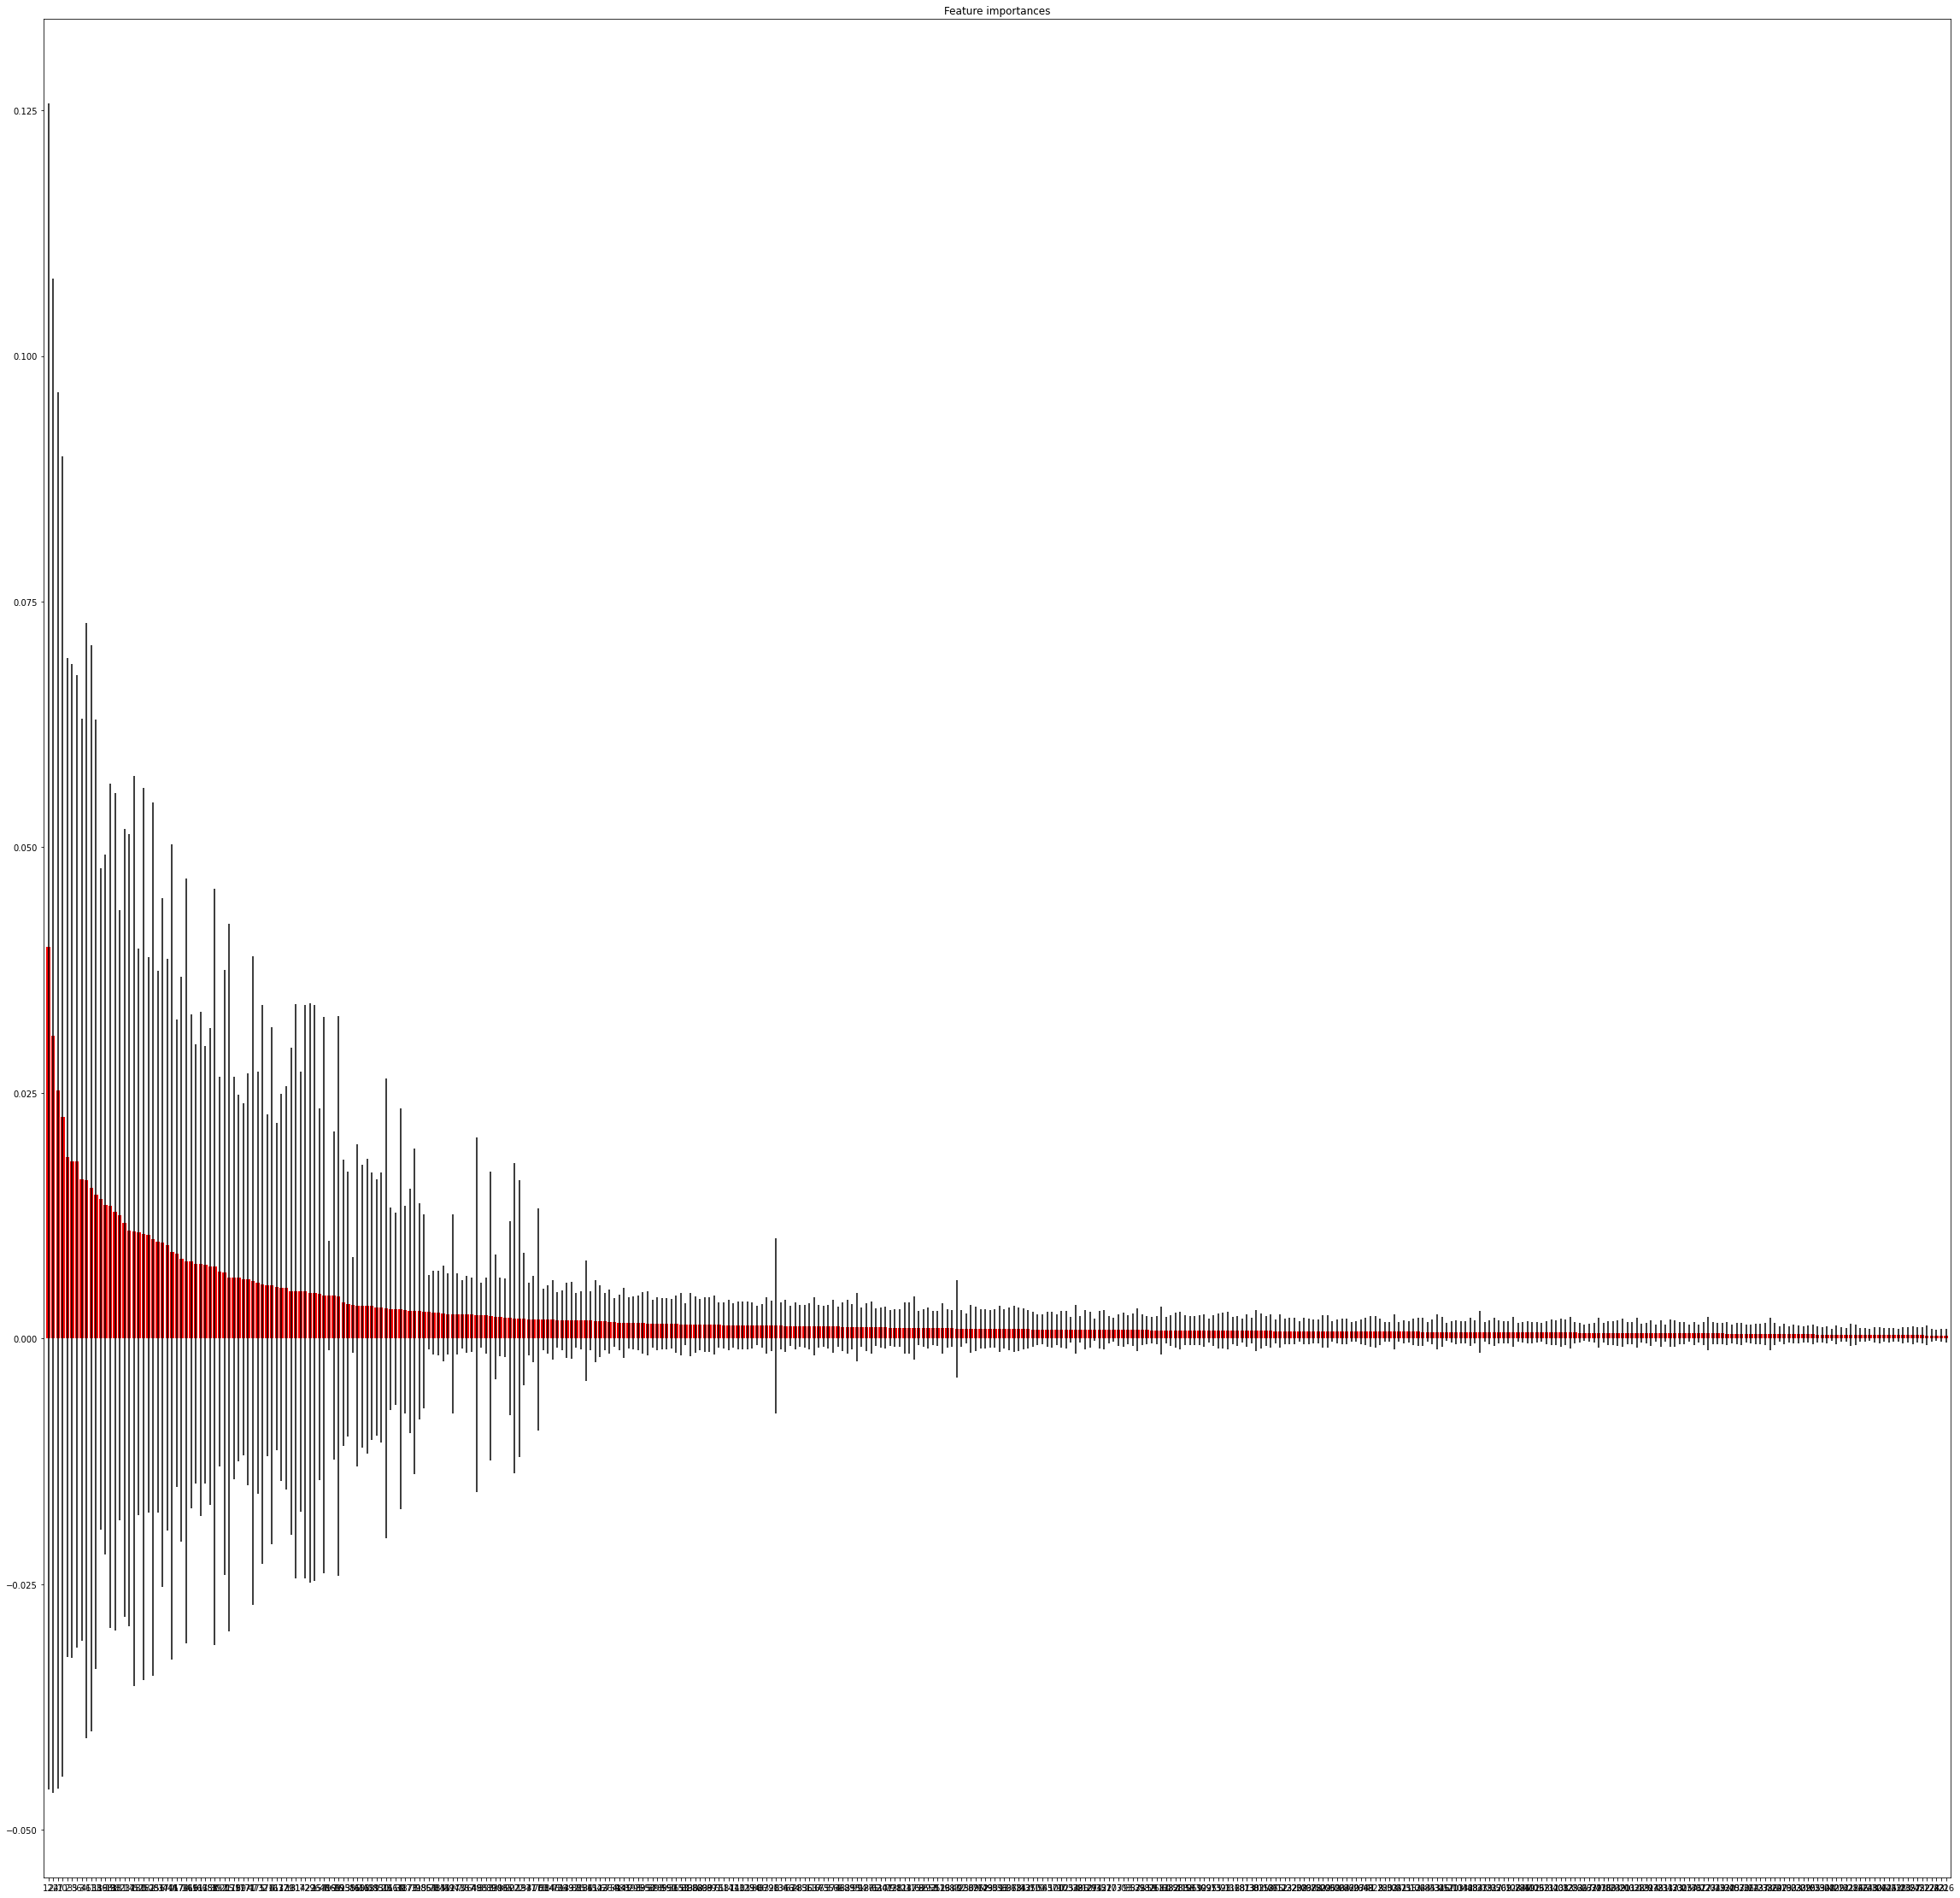

In [12]:
forest = model.best_estimator_['rf']
X= X_Test
importances = forest.feature_importances_

std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

# for f in range(X.shape[1]):
#     print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indi ces[f]]))
        
plt.figure(figsize  = (40,40))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
import Heuristics
rel('Heuristics')
labels = Heuristics.get_labels()

In [ ]:
Heuristics.HeuristicBuilder(np.random.randn(150)).shape

In [ ]:
indices[:30]

## Test with butterworth bandpass filter

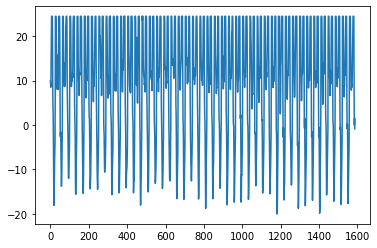

In [6]:
import pandas as pd 

df = pd.read_csv('Cardio_Data/Cleaned_data_full/Abhijit/6.0.csv')
res = df['Accel_LN_X_CAL']
plt.plot(df.index, res)

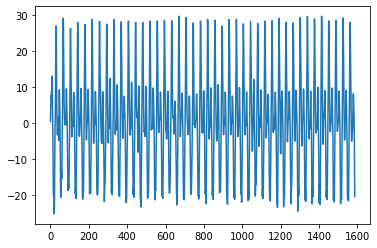

In [7]:
from scipy.signal import butter, sosfilt

but = butter(N = 4, Wn = (0.5,10), btype = 'bandpass', fs = 51.1, output = 'sos')
filtsig = sosfilt(but, res)
plt.plot(df.index, filtsig)

In [8]:
df.columns

Index(['Unnamed: 0', 'Accel_LN_X_UNCAL', 'Accel_LN_X_CAL', 'Accel_LN_Y_UNCAL',
       'Accel_LN_Y_CAL', 'Accel_LN_Z_UNCAL', 'Accel_LN_Z_CAL',
       'System_Timestamp_Plot_Zeroed_CAL', 'GSR_Skin_Resistance_CAL',
       'GSR_Skin_Resistance_UNCAL', 'Gyro_Z_CAL', 'Gyro_Z_UNCAL',
       'GSR_Range_CAL', 'GSR_Range_UNCAL', 'Timestamp_UNCAL', 'Timestamp_CAL',
       'Gyro_X_UNCAL', 'Gyro_X_CAL', 'Gyro_Y_UNCAL', 'Gyro_Y_CAL',
       'GSR_Skin_Conductance_UNCAL', 'GSR_Skin_Conductance_CAL',
       'GSR_Skin_Conductance_CAL.1', 'Accel_WR_Z_CAL', 'Accel_WR_Z_UNCAL',
       'Accel_WR_Y_UNCAL', 'Accel_WR_Y_CAL', 'Accel_WR_X_UNCAL',
       'Accel_WR_X_CAL', 'Resultant_Accel'],
      dtype='object')

In [9]:
t = np.linspace(0, 1, 1000, False)  # 1 second
a = np.sin(2*np.pi*10*t) + np.sin(2*np.pi*20*t)

In [10]:
a.shape

(1000,)

# Data Generation through SMOTE algorithm

In [22]:
from imblearn.over_sampling import SMOTENC

In [23]:
sm = SMOTENC(random_state = 31)

TypeError: __init__() missing 1 required positional argument: 'categorical_features'

In [18]:
print(X_Train.shape, y_Train.shape)

(1121, 128) (1121, 1)


In [24]:
X_Train_res , y_Train_res = sm.fit_resample(X_Train, y_Train)

ValueError: Unknown label type: 'continuous'

# Use SMOGN

In [27]:
%%capture
!pip install git+https://github.com/nickkunz/smogn.git


In [28]:
X_df = pd.DataFrame(X_Train)

In [30]:
X_df['label'] = y_Train
X_df.head()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,label
0,0.022287,0.000191,0.013808,-0.460467,0.316984,-0.004104,0.056722,0.012397,0.012397,0.020337,...,0.746366,0.746366,0.466218,162.887742,2.000000,0.148818,2.000000,0.031235,0.422359,3.2
1,0.023658,0.000121,0.011019,0.155164,0.299945,-0.002691,0.053223,0.017225,0.017225,0.013777,...,0.791851,0.791851,0.601455,208.083364,4.000000,0.048148,4.000000,0.250706,0.307638,3.2
2,0.052309,0.004422,0.066498,-1.423480,0.361022,-0.042524,0.151594,-0.007048,-0.007048,0.127573,...,0.714349,0.714349,0.488084,167.061304,4.666667,0.053905,4.666667,0.173134,0.540598,5.2
3,0.030430,0.000628,0.025058,2.197946,0.591488,-0.037007,0.120508,0.017679,0.017679,0.021784,...,0.660875,0.660875,0.945881,251.375999,1.333333,0.102656,1.333333,0.190226,0.602019,3.5
4,-0.032390,0.006197,0.078723,-0.995405,-0.176739,-0.148715,0.133724,-0.099603,-0.099603,0.119479,...,1.288318,1.288318,1.398566,748.096150,2.666667,0.327382,2.666667,0.160768,0.592771,6.0


In [36]:
import smogn
## specify phi relevance values
rg_mtrx = [

    [35000,  1, 0],  ## over-sample ("minority")
    [125000, 0, 0],  ## under-sample ("majority")
    [200000, 0, 0],  ## under-sample
    [250000, 0, 0],  ## under-sample
]
resSMOGN = smogn.smoter(
    
    ## main arguments
    data = X_df,           ## pandas dataframe
    y = 'label',          ## string ('header name')
    k = 7,                    ## positive integer (k < n)
    pert = 0.04,              ## real number (0 < R < 1)
    samp_method = 'balance',  ## string ('balance' or 'extreme')
    drop_na_col = True,       ## boolean (True or False)
    drop_na_row = True,       ## boolean (True or False)
    replace = False,          ## boolean (True or False)

    ## phi relevance arguments
    rel_thres = 0.10,         ## real number (0 < R < 1)
    rel_method = 'auto',    ## string ('auto' or 'manual')
    # rel_xtrm_type = 'both', ## unused (rel_method = 'manual')
    # rel_coef = 1.50,        ## unused (rel_method = 'manual')
    rel_ctrl_pts_rg = rg_mtrx ## 2d array (format: [x, y])
)

ValueError: redefine phi relevance function: all points are 1

# Bring in the algorithm

In [ ]:
from skLinearRegression import skLinearRegression
skLR = skLinearRegression()
model = skLR.model

# Plug the evaluator to LR grid

In [ ]:
#from Evaluator import Evaluator

In [ ]:
for dataKey, confDict in dataBuilder.confs.items():
    for confKey, confData in confDict.items():
        evaluator  = Evaluator.Evaluator(skLR.name, dataKey, model, confKey, confData)
        evaluator.train_model()
        evaluator.evaluate()
        evaluator.store()

In [ ]:
#Typical reload command
rel('skRandomForest')

# RandomForest Regressor

In [ ]:
rel('Evaluator')
from skRandomForest import skRandomForest
skRF = skRandomForest()
model = skRF.model

# Train RF

In [ ]:
for dataKey, confDict in dataBuilder.confs.items():
    for confKey, confData in confDict.items():
        evaluator  = Evaluator.Evaluator(skRF.name, dataKey, model, confKey, confData)
        evaluator.train_model()
        evaluator.evaluate()
        evaluator.store()

Best Random Forest Model

In [ ]:
skRF = skRandomForest()
bestModelRF = skRF.best_model()
bestModel.fit()

# Gaussian Process Regression

In [ ]:
rel('skGaussianProcess')
rel('Evaluator')

from skGaussianProcess import skGaussianProcess

skGP = skGaussianProcess()
model = skGP.model

In [ ]:
for dataKey, confDict in dataBuilder.confs.items():
    for confKey, confData in confDict.items():
        evaluator  = Evaluator.Evaluator(skGP.name, dataKey, model, confKey, confData)
        evaluator.train_model()
        evaluator.evaluate()
        evaluator.store()

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
gp = GaussianProcessRegressor()

In [ ]:
gp.get_params()

# Kmeans + RandomForest

## Test with the best conf, framesize random forest configuraions.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from Evaluator import mean_absolute_percentage_error

skKM = KMeans(n_clusters=2,max_iter = 10000000)
confData = dataBuilder.confs['data1']['conf5']

train_cluster_indices = list()
test_cluster_indices = list()

skKM.fit(confData[0])
preds = skKM.transform(confData[0])
labels = skKM.labels_


In [ ]:
# plt.scatter(confData[1],confData[1], c=['blue' if a ==0 else 'red' for a in labels], alpha = 0.1)
df = pd.DataFrame(data = np.hstack((confData[1], labels.reshape(-1,1))), columns = ['speed', 'label'])

In [ ]:
clust1 = np.where(labels==0)
clust2 = np.where(labels==1)

X_Train1 = np.take(confData[0], clust1,axis=0)[0]
y_Train1 = np.take(confData[1], clust1,axis=0)[0]

X_Train2 = np.take(confData[0], clust2,axis=0)[0]
y_Train2 = np.take(confData[1], clust2,axis=0)[0]

In [ ]:
preds = skKM.predict(confData[2])

In [ ]:
c1 = np.where(preds==0)
c2 = np.where(preds==1)

X_Test1 = np.take(confData[2], c1,axis=0)[0]
y_Test1 = np.take(confData[3], c1,axis=0)[0]

X_Test2 = np.take(confData[2], c2,axis=0)[0]
y_Test2 = np.take(confData[3], c2,axis=0)[0]

In [ ]:
pca = PCA(n_components=25)
rf = RandomForestRegressor(max_depth=60, min_samples_leaf=3, min_samples_split=8, n_estimators=250)

pipe = Pipeline(steps = [
    #('pca',pca), 
    ('rf', rf)])


pipe.fit(X_Train1, y_Train1.flatten())

preds1 = pipe.predict(X_Test1)

r1 = [mean_absolute_error(preds1, y_Test1), r2_score(preds1, y_Test1), mean_absolute_percentage_error(preds1, y_Test1)]
print(r1)

plt.scatter(y_Test1,preds1)
plt.figure(figsize=(7,7))
plt.show()

In [ ]:
pca = PCA(n_components=25)
rf = RandomForestRegressor(max_depth=60, min_samples_leaf=3, min_samples_split=8, n_estimators=250)

pipe = Pipeline(steps = [('rf', rf)])

pipe.fit(X_Train2, y_Train2.flatten())

preds2 = pipe.predict(X_Test2)

r2 = [mean_absolute_error(preds2, y_Test2), r2_score(preds2, y_Test2), mean_absolute_percentage_error(preds2, y_Test2)]

print(r2)
plt.scatter(y_Test2,preds2)
plt.figure(figsize=(7,7))
plt.show()

In [ ]:
print("Overall results for clustering + Regression : {}".format((r1+r2)/2))


In [ ]:
(np.array(r1) + np.array(r2))/2

# Classifier + RandomForest


In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor

In [ ]:
confData = dataBuilder.confs['data1']['conf5']
s = 4.5

In [ ]:
classes = np.array([0 if speed< s else 1 for speed in confData[1]])
cls1 = np.where(classes==0)
cls2 = np.where(classes==1)

X_Train1 = np.take(confData[0], cls1,axis=0)[0]
y_Train1 = np.take(confData[1], cls1,axis=0)[0]

X_Train2 = np.take(confData[0], cls2,axis=0)[0]
y_Train2 = np.take(confData[1], cls2,axis=0)[0]

In [ ]:
clas = np.array([0 if speed< s else 1 for speed in confData[3]])

c1 = np.where(clas==0)
c2 = np.where(clas==1)

X_Test1 = np.take(confData[2], c1,axis=0)[0]
y_Test1 = np.take(confData[3], c1,axis=0)[0]

X_Test2 = np.take(confData[2], c2,axis=0)[0]
y_Test2 = np.take(confData[3], c2,axis=0)[0]

In [ ]:
clf = svm.SVC()
clf.fit(confData[0],classes)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(clf.predict(confData[2]), clas)

In [ ]:
pca = PCA(n_components=25)
rf = RandomForestRegressor(max_depth=60, min_samples_leaf=3, min_samples_split=8, n_estimators=250)

pipe = Pipeline(steps = [
    ('pca',pca), 
    ('rf', rf)])


pipe.fit(X_Train1, y_Train1.flatten())

preds1 = pipe.predict(X_Test1)

r1 = [mean_absolute_error(preds1, y_Test1), r2_score(preds1, y_Test1), mean_absolute_percentage_error(preds1, y_Test1)]

print(r1)

plt.scatter(y_Test1,preds1)
plt.figure(figsize=(7,7))
plt.show()

In [ ]:
pca = PCA(n_components=25)
rf = RandomForestRegressor(max_depth=60, min_samples_leaf=3, min_samples_split=8, n_estimators=250)

pipe = Pipeline(steps = [('rf', rf)])

pipe.fit(X_Train2, y_Train2.flatten())

preds2 = pipe.predict(X_Test2)

r2 = [mean_absolute_error(preds2, y_Test2), r2_score(preds2, y_Test2), mean_absolute_percentage_error(preds2, y_Test2)]
print(r2)

plt.scatter(y_Test2,preds2)
plt.figure(figsize=(7,7))
plt.show()

In [ ]:
print("Overall results for clustering + Regression : {}".format((np.array(r1)+np.array(r2)/2)))